In [1]:
import os
import workspace_path
os.chdir(workspace_path.path)
os.getcwd()

'e:\\Code\\openmmlab\\mmsegmentation'

## 载入图像和ONNX模型

In [2]:
img_path = 'data/watermelon_test1.jpg'
onnx_seg = '../mmdeploy/mmseg2onnx_deeplabv3plus'  # 这里载入的是生成的文件夹, end2end.onnx在里面

import cv2
img_bgr = cv2.imread(img_path)
from mmdeploy_runtime import Segmentor
device = 'cpu'
# device = 'cuda'   # 当使用cuda时, 由于模型推理占用了内核, 所以无法在notebook中执行代码, 需要在终端本地运行
segmentor = Segmentor(onnx_seg, device)

## 语义分割推理预测

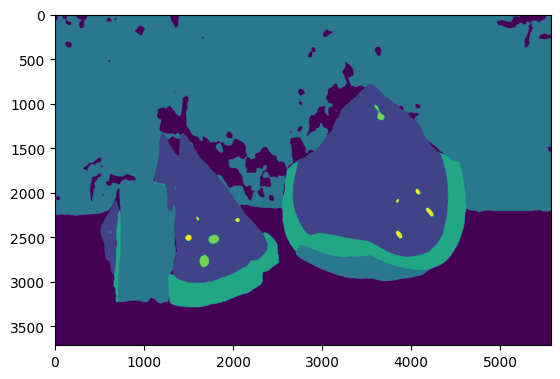

In [3]:
pred_mask = segmentor(img_bgr)

import matplotlib.pyplot as plt
plt.imshow(pred_mask)
plt.show()

## 配色方案

In [4]:
palette = [
    ['background', [127,127,127]],
    ['red', [0,0,200]],
    ['green', [0,200,0]],
    ['white', [144,238,144]],
    ['seed-black', [30,30,30]],
    ['seed-white', [8,189,251]]
]
palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

## 可视化语义分割预测结果

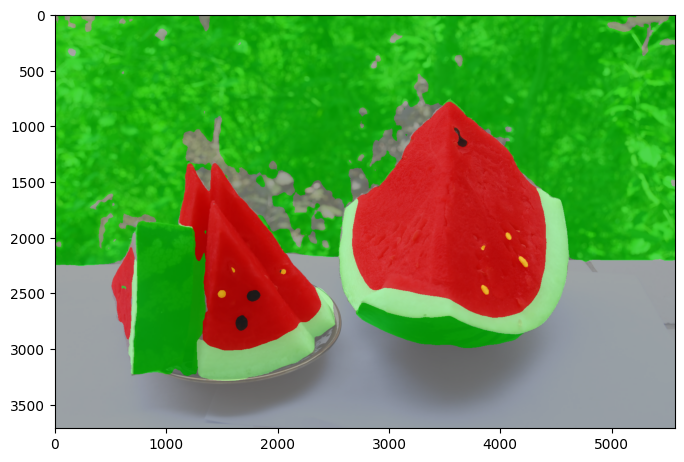

In [5]:
import numpy as np
opacity = 0.3 # 透明度，越大越接近原图
# 将预测的整数ID，映射为对应类别的颜色
pred_mask_bgr = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3))
for idx in palette_dict.keys():
    pred_mask_bgr[np.where(pred_mask==idx)] = palette_dict[idx]
pred_mask_bgr = pred_mask_bgr.astype('uint8')
# 将语义分割预测图和原图叠加显示
pred_viz = cv2.addWeighted(img_bgr, opacity, pred_mask_bgr, 1-opacity, 0)
plt.figure(figsize=(8, 8))
plt.imshow(pred_viz[:,:,::-1])
plt.show()